In [89]:
import tephi
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def best_fitting(file):

    data = np.genfromtxt(file)
    
    pressure = data[:,0]
    dew_point = data[:,3]
    pot_temp = data[:,8]
    temp = data[:,2]
    
    m=np.linspace(0.001,10,1000)
    rms = []
    for i in range(1000):
        temp = pressure_mixing_ratio_to_temperature(pressure[0], m[i])
        rms.append((temp - dew_point[0])**2)

    for j in range(len(rms)):
        if rms[j] == min(rms):
            best_m = m[j]
        
    print('Best fitting mixing ratio = %1.2f' %best_m)

    P = np.linspace(800,2000,200)
    rms2 = []
    for i in range(200):
        temp = pressure_mixing_ratio_to_temperature(P[i], best_m)
        potential = temp*(1000/P[i])**(287/1010) + 273.15
    
        rms2.append((pot_temp[0] - potential)**2)

    for j in range(len(rms2)):
        if rms2[j] == min(rms2):
            best_P = P[j]
        
    print('Best fitting Pressure = %1.0f hPa' %best_P)
    
    return rms, rms2, m, P

In [93]:
def pressure_mixing_ratio_to_temperature(pressure, mixing_ratio):
    """
    Transform pressure and mixing ratios to temperature.

    Args:

    * pressure:
        Pressure in mb in hPa.

    * mixing_ratio:
        Dimensionless mixing ratios.

    Returns:
        Temperature in degC.

    """
    CONST_KELVIN = 273.15
    CONST_L = 2.5e6
    CONST_RV = 461
    
    # Calculate the dew-point.
    vapp = pressure * (8.0 / 5.0) * (mixing_ratio / 1000.0)
    temp = 1.0 / ((1.0 / CONST_KELVIN) - ((CONST_RV / CONST_L) * np.log(vapp / 6.11)))
    temp = temp - CONST_KELVIN
    return temp

In [119]:
#Load data from txt file for Plotting
file = 'nottingham_03354_050117_1200.txt'
data = np.genfromtxt(file)

In [120]:
#Just take data columns for plotting (pressure, dew-point temperature)
pressure = data[:,0]
dew_point = data[:,3]
pot_temp = data[:,8]
temp = data[:,2]

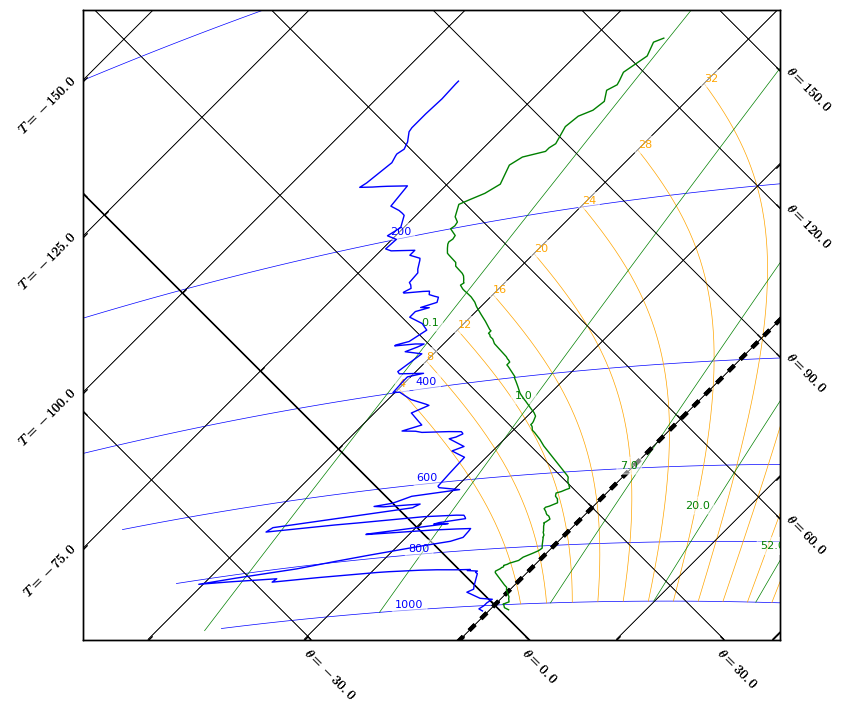

Best fitting mixing ratio = 3.47
Best fitting Pressure = 1216 hPa


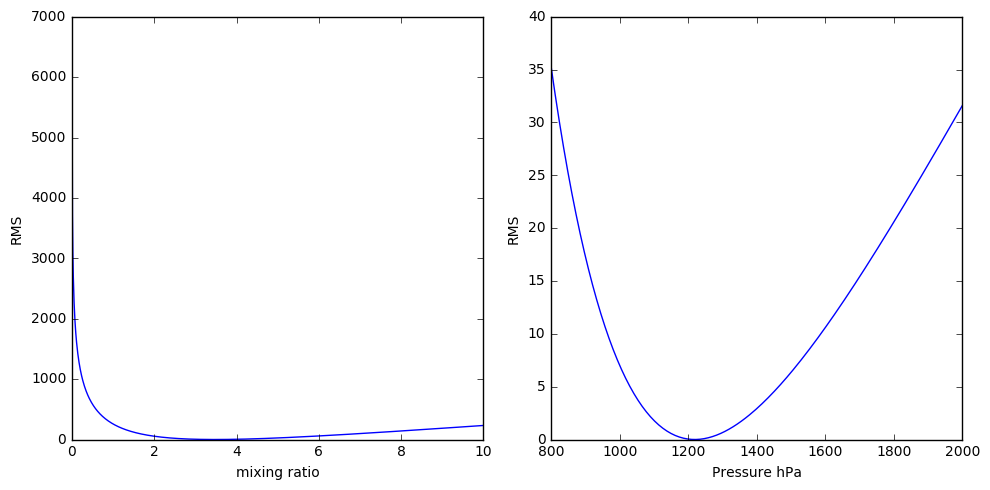

In [123]:
#Set up values
values = []
for p,t in zip(pressure, dew_point):
    values.append([p,t])
    
#Set minimum extent of isobars
tephi.MIN_THETA = -40

tpg = tephi.Tephigram()
tpg.plot(values)

values = []
for p,t in zip(pressure, temp):
    values.append([p,t])

tpg.plot(values)
plt.show()

  
rms, rms2, m, P = best_fitting(file)

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot(m,rms)
plt.xlabel('mixing ratio')
plt.ylabel('RMS')

plt.subplot(1,2,2)
plt.plot(P,rms2)
plt.xlabel('Pressure hPa')
plt.ylabel('RMS')

plt.tight_layout()
plt.show()

In [126]:
files = ['nottingham_03354_050117_1200.txt','torshavn_06011_050117_1200.txt','bamako_61291_050117_1200.txt','jan_mayen_01001_050117_1200.txt']

for f in files:
    print('-----------------')
    print(f)
    best_fitting(f)
    print('-----------------')

-----------------
nottingham_03354_050117_1200.txt
Best fitting mixing ratio = 3.47
Best fitting Pressure = 1216 hPa
-----------------
-----------------
torshavn_06011_050117_1200.txt
Best fitting mixing ratio = 4.13
Best fitting Pressure = 1301 hPa
-----------------
-----------------
bamako_61291_050117_1200.txt
Best fitting mixing ratio = 4.34
Best fitting Pressure = 2000 hPa
-----------------
-----------------
jan_mayen_01001_050117_1200.txt
Best fitting mixing ratio = 4.13
Best fitting Pressure = 1301 hPa
-----------------
